In [3]:
!pip install opencv-python

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)


# OpenCV(Computer Vision)
- 다양한 이미지 영상/동영상 처리에 사용되는 오픈소스 라이브러리

In [2]:
import cv2
import numpy as np

## 이미지 출력

In [3]:
img = cv2.imread("img/0.jpg") # 해당경로의 파일 읽어오기
#cv2.imshow('img', img) # img라는 이름의 창에 img를 표시
#cv2.waitKey(0) # 지정된 시간 동안 사용자 키 입력 대기
#cv2.destroyAllWindows() # 모든창 닫기

In [4]:
print(img.shape)
print(img.size)
print(img.dtype)

(128, 126, 3)
48384
uint8


# 색상 나누기

In [7]:

b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

cv2.imshow("blue channel", b)
cv2.imshow("green channel", g)
cv2.imshow("red channel", r)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 색상 추적

In [4]:
import cv2
import numpy as np

img = cv2.imread("img/1.jpg")
cv2.imshow('Original', img)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lower = np.array([-10, 100, 100])
upper = np.array([150, 118, 137])

mask = cv2.inRange(hsv, lower, upper)
img2 = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('Extract Color', img2)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

# 에지 추출

In [5]:
import cv2

img = cv2.imread("img/0.jpg", cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(img, 50, 200)
# 색상 반전
edge2 = cv2.bitwise_not(edge)

cv2.imshow("edge", edge)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

# 히스토그램

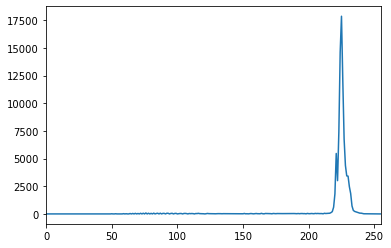

In [19]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img/na.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("original", img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)
plt.xlim([0, 255])
plt.show()

k = cv2.waitKey(0)
cv2.destroyAllWindows()

## 히스토그램 균일화

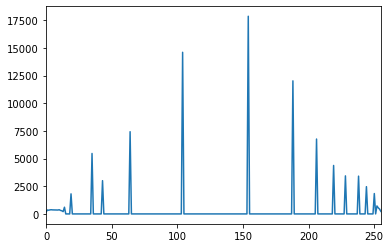

In [20]:
img = cv2.equalizeHist(img)
cv2.imshow("equalize", img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)
plt.xlim([0, 255])
plt.show()

k = cv2.waitKey(0)
cv2.destroyAllWindows()

## 히스토그램 균일화 적용된 이미지 에지 추출

In [16]:
edge = cv2.Canny(img, 50, 200)
# 색상 반전
edge2 = cv2.bitwise_not(edge)

cv2.imshow("edge", edge)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

### clahe() 함수 적용

In [12]:
def clahe(img):
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))
    img2 = clahe.apply(img)
    
    res = np.hstack((img, img2))
    
    cv2.imshow('clahe' , res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
clahe(img)

### 적용된 이미지 에지추출

In [13]:
edge = cv2.Canny(img2, 50, 200)
# 색상 반전
edge2 = cv2.bitwise_not(edge)

cv2.imshow("edge", edge)

k = cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'img2' is not defined

# 명훈쌤

In [6]:
import cv2
import numpy as np
img = cv2.imread("./img/0.jpg")

cv2.imshow("original",img)

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

# 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

# h : -180 ~ 180
# s : 0 ~ 255
# v : 0 ~ 255
# 최소값
lower = np.array([100, 0, 0])
# # 최대값
upper = np.array([180, 255, 255])
# # 출력
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# # 최소값과 최대값에 해당되는 범위를 마스크로 생성
mask = cv2.inRange(hsv, lower, upper)
# # 마스크에 포함된 이미지 픽셀값만을 (마스크와 이미지를 AND 연산) 이미지에 표시
img = cv2.bitwise_and(img, img, mask=mask)

img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


cv2.imshow("clahe", img_clahe)
cv2.imshow("mask", img)
cv2.waitKey(0)
cv2.destroyAllWindows()